In [54]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     random_projection)


%matplotlib inline

digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30



Automatically created module for IPython interactive environment


In [55]:

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(digits.data.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
#     plt.xticks([]), plt.yticks([])
#     if title is not None:
#         plt.title(title)



([], <a list of 0 Text yticklabel objects>)

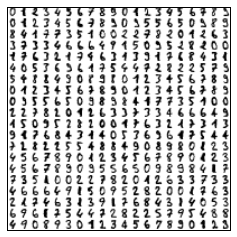

In [56]:

#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')



Computing random projection


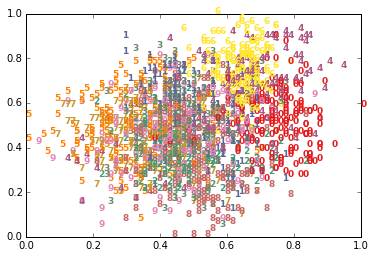

In [57]:

#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")




Computing PCA projection


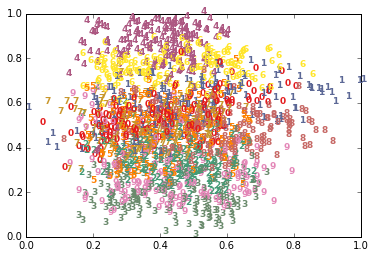

In [58]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))



In [59]:
from sklearn.lda import LDA

Computing Linear Discriminant Analysis projection


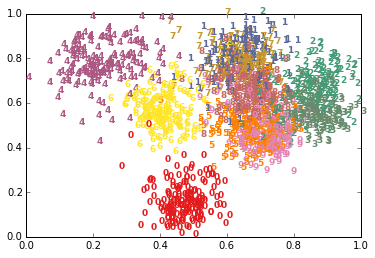

In [60]:
#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = LDA(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))




Computing Isomap embedding
Done.


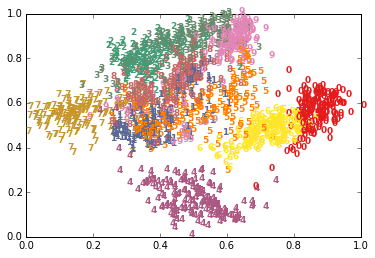

In [61]:
#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))




Computing LLE embedding
Done. Reconstruction error: 5.16179e-07


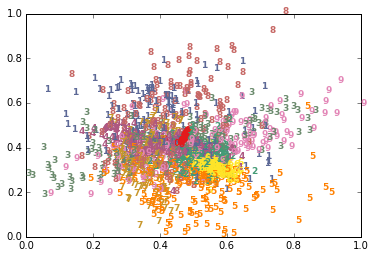

In [62]:
#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))




Computing modified LLE embedding
Done. Reconstruction error: 0.560624


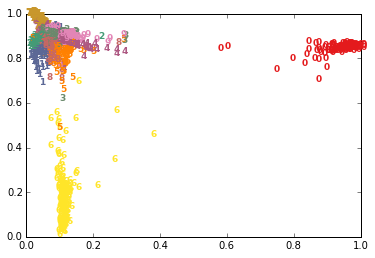

In [63]:
#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))




Computing Hessian LLE embedding
Done. Reconstruction error: 0.343065


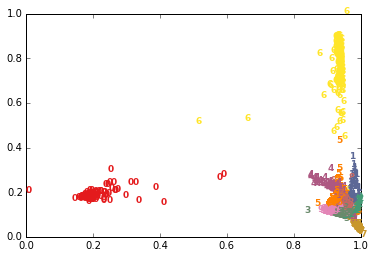

In [64]:
#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))




Computing LTSA embedding
Done. Reconstruction error: 0.343086


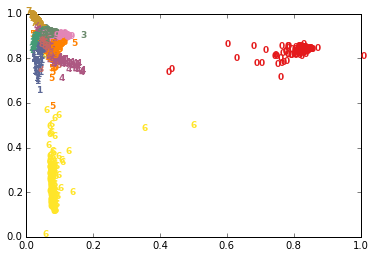

In [65]:
#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))



Computing MDS embedding
Done. Stress: 479566192.474942


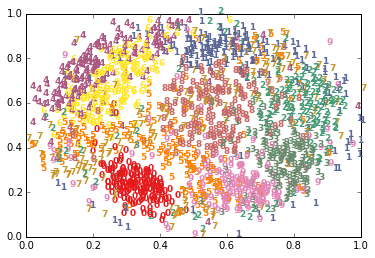

In [66]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))



Computing Totally Random Trees embedding


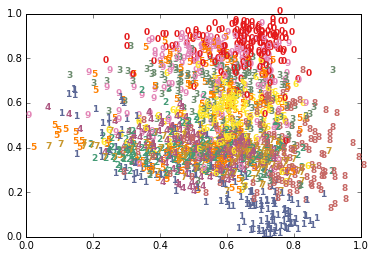

In [67]:
#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))



Computing Spectral embedding


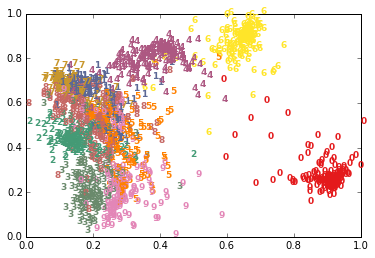

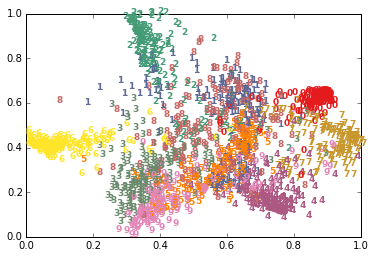

In [73]:
#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=4, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se[:,:2],
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

plot_embedding(X_se[:,2:4],
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()



Computing t-SNE embedding


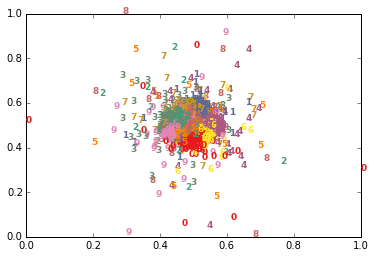

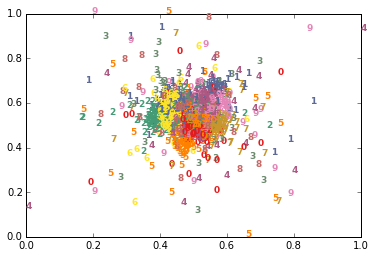

In [74]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=4, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne[:,:2],
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()


plot_embedding(X_tsne[:,2:4],
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

<h2 style="color:red"> Proposed</h2>

In [105]:
from sklearn.cluster import KMeans
def Prototyping(dataset,numP):
    kmeans = KMeans(init='k-means++',n_clusters=numP)
    kmeans.fit(dataset)
    centers = kmeans.cluster_centers_
    return centers

def WeightedPrototyping(dataset,numP):
    kmeans = KMeans(init='k-means++',n_clusters=numP)
    kmeans.fit(dataset)

#     print 'initiated clustered data:'
    plotData2(X,Y,kmeans.labels_,'a')

    centers = kmeans.cluster_centers_
    clu = kmeans.labels_
    a = np.zeros(numP,dtype=int)
    for i in range(len(clu)):
        a[clu[i]] += 1
    return centers,a
def distance2(p1,p2):
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2
def similarity(p1,p2,sigma):
    sigma = 10
    return np.exp((-distance2(p1,p2)**2)/(2*(sigma**2)))


def bipartiteUnsupervised(X,centers,sigma):
    numS = X.shape[0]
    numP = centers.shape[0]
    print numS,numP
    N = numS + numP
    W = sps.lil_matrix((N,N))
    for i in xrange(numS):
        for j in xrange(numP):
            W[i,numS+j] = similarity(X[i],centers[j],sigma)
            W[numS+j,i] = W[i,numS+j]
    W = sps.csr_matrix(W)
    d = np.array(W.sum(axis=0))
    D = sps.diags(d,[0])
    L = D - W
    return W,D,L

def bipartiteSupervised(X,y,centers,sigma):
    numS = X.shape[0]
    numP = centers.shape[0]
    numL = len(np.unique(sorted(y)))
    print numS,numP,numL
    N = numS+numP+numL
    W = sps.lil_matrix((N,N))
    for i in xrange(numS):
        for j in xrange(numP):
            W[i,numS+j] = similarity(X[i],centers[j],sigma)
            W[numS+j,i] = W[i,numS+j]

    P1 = np.sum(y)
    P2 = len(y) - P1
    for i in xrange(numS):
        W[i,numS+numP+y[i]] = 1.
        W[numS+numP+y[i],i] = 1.


    W = sps.csr_matrix(W)
    d = np.array(W.sum(axis=0))
    D = sps.diags(d,[0])
    L = D - W
    return W,D,L


import scipy as sp
def normalized2(W,D,L):
    N = W.shape[0]
    L = D - W
    eigenValues , eigenVectors = sp.sparse.linalg.eigs(L,M=D,k=10)
    eigenValues = eigenValues.real
    idx = eigenValues.argsort()
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues,eigenVectors

1797 100
0 2


c:\Anaconda\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:228: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


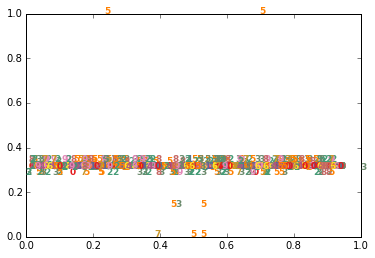

2 4


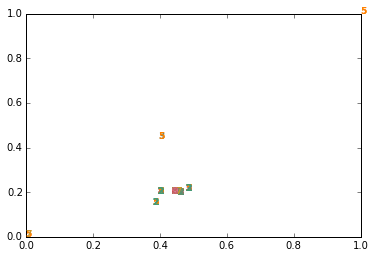

4 6


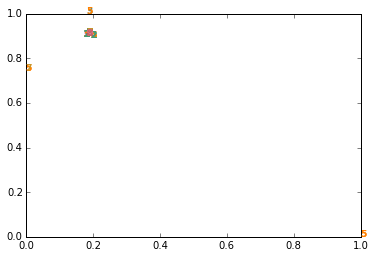

6 8


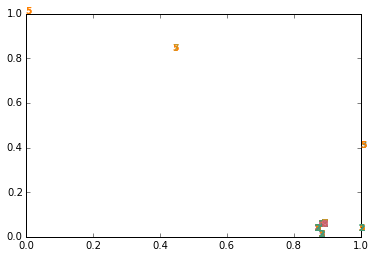

8 10


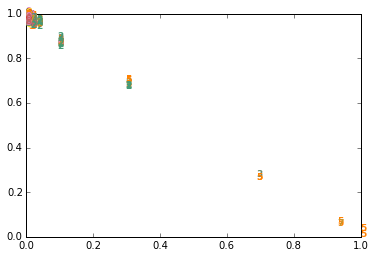

In [106]:

# for numP in [6,10,20,30,50,100]:
#prototyping
# numP = 40
from scipy import sparse as sps
from sklearn.cluster import KMeans
centers = Prototyping(X,numP)

numS = X.shape[0]
N = numS + numP
sigma = 1


W,D,L = bipartiteUnsupervised(X,centers,sigma)
eigenValues,eigenVectors = normalized2(W,D,L)

for i in [0,2,4,6,8]:
    X_UN = eigenVectors[:numS,i:i+2]
    print i,i+2
    plot_embedding(X_UN)

    plt.show()

1797 100 10
0 2


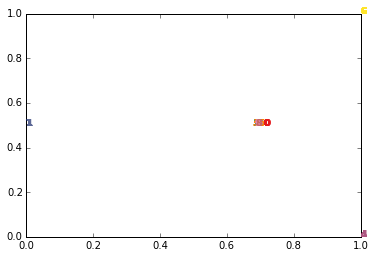

2 4


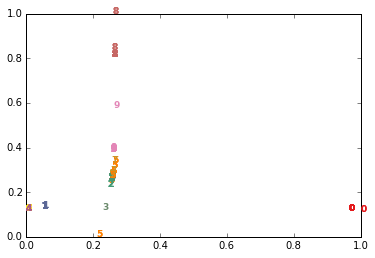

4 6


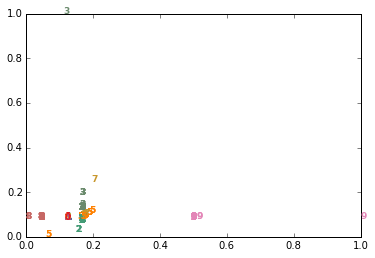

6 8


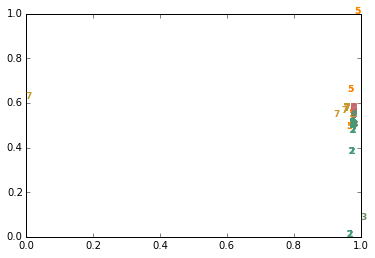

In [108]:

# for numP in [6,10,20,30,50,100]:
#     print numP
#prototyping
#     numP = 100

from sklearn.cluster import KMeans
centers = Prototyping(X,numP)

numS = X.shape[0]
N = numS + numP
sigma = 1

W,D,L = bipartiteSupervised(X,y,centers,sigma)
eigenValues,eigenVectors = normalized2(W,D,L)

for i in [0,2,4,6]:
    X_SU = eigenVectors[:numS,i:i+2]
    print i,i+2
    plot_embedding(X_SU)

    plt.show()


In [91]:
def plot_embedding2(X, title=None):
#     x_min, x_max = np.min(X, 0), np.max(X, 0)
#     X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})